In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.interpolate import griddata
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

from datetime import timedelta as delta
from datetime import datetime

import networkx as nx

from parcels import (grid, Field, FieldSet, ParticleSet, JITParticle, ScipyParticle, AdvectionRK4,
                     ErrorCode, ParticleFile, Variable, plotTrajectoriesFile)

from importlib import reload
from glob import glob

import sys
sys.path.append('/science/users/4302001/arctic-connectivity/tools')
sys.path.append('/Users/daanreijnders/surfdrive/Thesis/repo/tools')
import plot
import community
import fieldsetter_cmems
import advectParticles

Stripy is not available on this machine.


In [2]:
reload(plot)
reload(community)
reload(fieldsetter_cmems)
reload(advectParticles)

Stripy is not available on this machine.


<module 'advectParticles' from '/science/users/4302001/arctic-connectivity/tools/advectParticles.py'>

In [3]:
readDir = "/data/oceanparcels/input_data/CMEMS/GLOBAL_REANALYSIS_PHY_001_030/"
meanDir = "/data/oceanparcels/input_data/CMEMS/GLOBAL_REANALYSIS_PHY_001_030_monthly/"
fieldFiles = sorted(glob(readDir + "mercatorglorys12v1_gl12_mean_*.nc"))

In [4]:
ds = xr.open_dataset(fieldFiles[0])

In [5]:
fieldset = fieldsetter_cmems.create(20010101, 3, antiBeach=False)

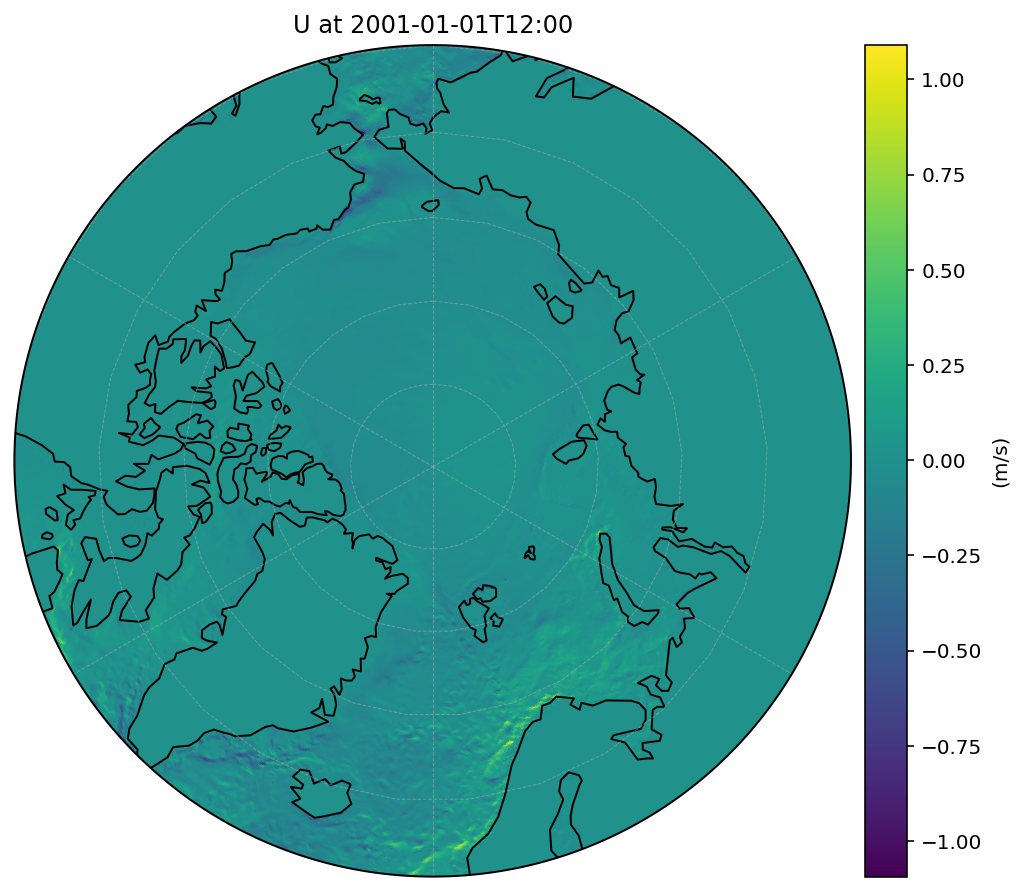

In [9]:
fig, ax = plot.from_field(fieldset.U, land=False, latRange=(60,90), polar=True, size=(8,8))

# Velocity & Sea Ice

In [34]:
ds.latitude[1680:]

<xarray.DataArray 'latitude' (latitude: 361)>
array([60.      , 60.083332, 60.166668, ..., 89.833336, 89.916664, 90.      ],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 60.0 60.083332 60.166668 ... 89.916664 90.0
Attributes:
    valid_min:      -80.0
    valid_max:      90.0
    step:           0.08333588
    units:          degrees_north
    unit_long:      Degrees North
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [60]:
vmean = np.sqrt(ds.uo[0, 0, 1680:, :]**2 + ds.uo[0, 0, 1680:, :]**2).data
iceconc = np.where(np.isnan(ds.siconc[0, 1680:, :].data), 0., ds.siconc[0, 1680:, :].data)

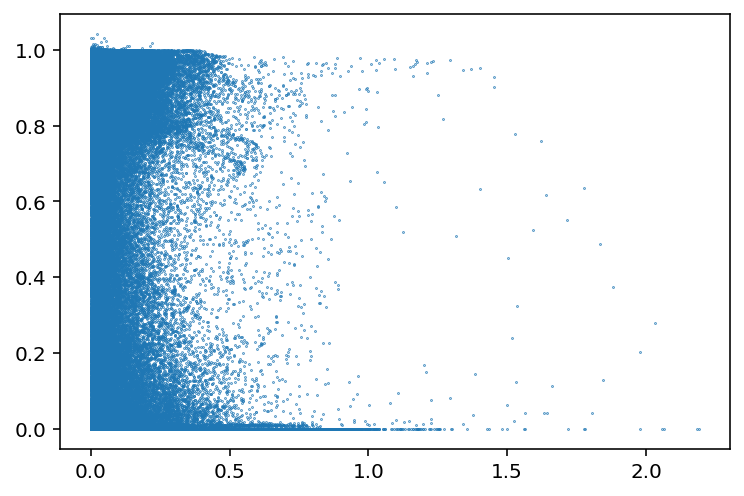

In [61]:
plt.scatter(vmean.flatten(), iceconc.flatten(), s=0.1, )

In [63]:
maskNoIce = iceconc == 0
mask95Ice = iceconc > 0.95

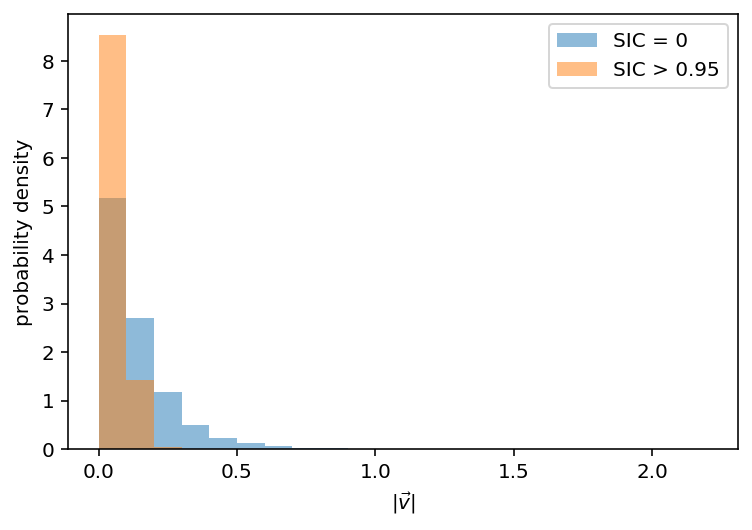

In [82]:
fig, ax = plt.subplots()
ax.hist(vmean[maskNoIce].flatten(), bins=22, range=(0, 2.2), density=True, alpha=0.5, label="SIC = 0")
ax.hist(vmean[mask95Ice].flatten(), bins=22, range=(0, 2.2), density=True, alpha=0.5, label="SIC > 0.95")
ax.set_xlabel(r"$|\vec{v}|$")
ax.set_ylabel("probability density")
ax.legend()

In [ ]:
np.histogram(, range)

In [70]:
vmean[~np.isnan(vmean)].max()

2.191649